In [87]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

titanic = pd.read_csv('./titanic-data-6.csv')

display(titanic.head())
titanic.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [88]:
def limpa(coluna,valor):
    titanic[coluna].fillna(valor,inplace=True)
    return titanic.head(6)
    
    
def remove(colunas):
    for i in range(0, len(colunas)):
        titanic.drop([colunas[i]],axis = 1, inplace = True)
    return titanic.head()

colunas = ['Fare','Ticket','Cabin','PassengerId','SibSp']
remove(colunas)

,Survived,Pclass,Name,Sex,Age,Parch,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,S


In [89]:
titanic_idade = titanic.copy()
titanic_idade.drop(titanic[titanic['Age'].isnull() == True].index ,inplace=True)

In [90]:
titanic['Not Survived'] = titanic['Survived'].map({0:1,1:0})

In [91]:
print('Sobreviventes     :', titanic['Survived'].value_counts()[1])
print('Não Sobreviventes :', titanic['Survived'].value_counts()[0])

Sobreviventes     : 342
Não Sobreviventes : 549


Text(0, 0.5, '')

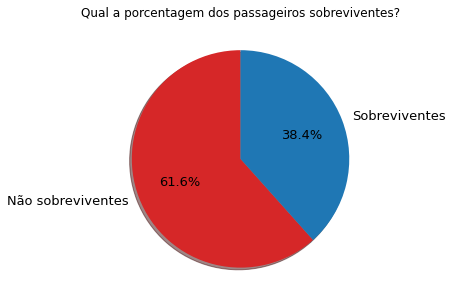

In [92]:
titanic['Survived'].value_counts().plot.pie(colors=('tab:red', 'tab:blue'), 
                                       title='Qual a porcentagem dos passageiros sobreviventes?', 
                                       fontsize=13, shadow=True, startangle=90,autopct='%1.1f%%',
                                       labels=('Não sobreviventes','Sobreviventes'),
                                       figsize=(5,5)).set_ylabel('')

Text(0, 0.5, 'Frequência')

<Figure size 432x288 with 0 Axes>

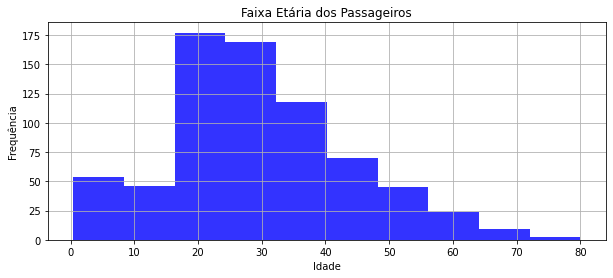

In [93]:
#Gera histograma de frequencia de idade
plt.figure();
titanic_idade.hist(column='Age', color=('blue'), alpha=0.8, bins=10, figsize=(10,4))
plt.title('Faixa Etária dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Frequência')

(Text(0, 0.5, ''), Text(0.5, 0, ''))

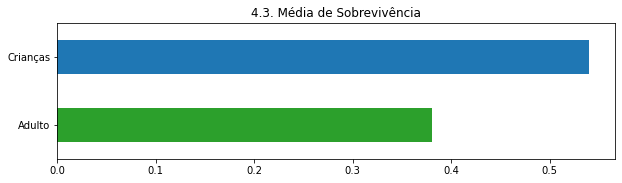

In [94]:
titanic_idade['Crianca_Adulto'] = 0
titanic_idade.loc[titanic_idade[titanic_idade['Age'] < 18].index, 'Crianca_Adulto'] = 'Crianças'
titanic_idade.loc[titanic_idade[titanic_idade['Age'] >= 18].index, 'Crianca_Adulto'] = 'Adulto'
titanic_idade.groupby('Crianca_Adulto')[['Survived']].mean()

titanic_idade.groupby('Crianca_Adulto')['Survived'].mean().plot.barh(title='4.3. Média de Sobrevivência', figsize=(10,2.5),
                                                                color=('tab:green','tab:blue')).set_ylabel(''),plt.xlabel('')

Conclusões

Foi possível identificar neste trabalho de análise de dados exploratório, que algumas características foram primordiais para a sobrevivência dos indivíduos.

Primeiro que apenas 38,4 % das pessoas sobreviveram ao Titanic, falando de números absolutos foram 342 pessoas que sobreviveram, em universo de 891 pessoas.

Identificamos que as crianças foram protegidas e tiveram uma chance de sobrevivência muito superior aos adultos, na faixa de 0,56 de sobrevivência para as crianças e 0,37 para os adultos.

Seria possível obter outros pontos de vista e insights interessantes, analisando dados como: sexo, classe, faixa etária, entre outras informações em trabalhos futuros.

# Sobreviventes por classe

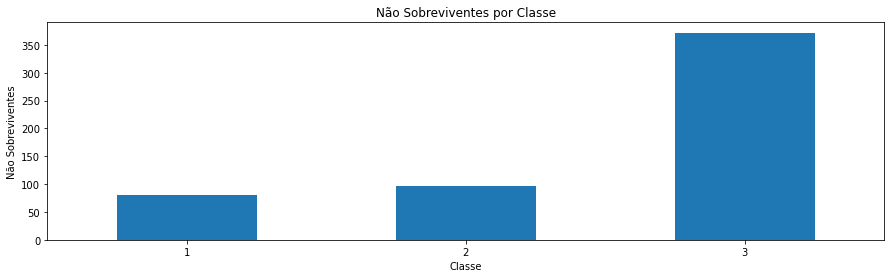

Pclass
1     80
2     97
3    372
Name: Survived, dtype: int64

In [95]:
sobreviventes_por_classe_df = titanic[titanic['Survived'] == 0].groupby('Pclass')
sobreviventes_por_classe_df['Survived'].count().plot(kind='bar',title='Não Sobreviventes por Classe',rot=0 , figsize=(15,4)).set_xlabel('Classe')
plt.ylabel('Não Sobreviventes')
plt.show()
display(sobreviventes_por_classe_df['Survived'].count())


# Não sobreviventes por classe

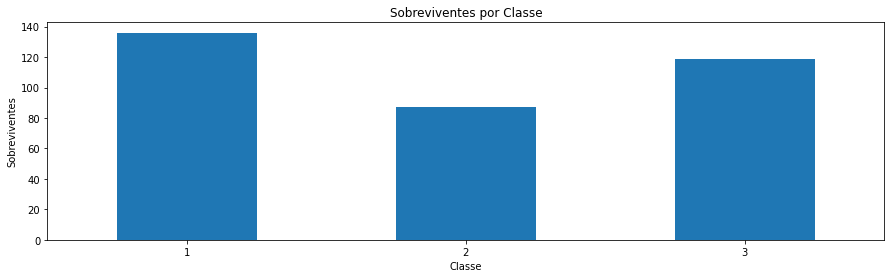

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [96]:
nao_sobreviventes_por_classe_df = titanic[titanic['Survived'] == 1].groupby('Pclass')
nao_sobreviventes_por_classe_df['Survived'].count().plot(kind='bar',title='Sobreviventes por Classe',rot=0 , figsize=(15,4)).set_xlabel('Classe')
plt.ylabel('Sobreviventes')
plt.show()
display(nao_sobreviventes_por_classe_df['Survived'].count())

# Mulheres e crianças

In [97]:
prioritarios = (titanic['Age'] <= 15) & (titanic['Age']  > 0) | (titanic['Sex'] == 'Feminino')
prioritarios = titanic[prioritarios]
display(prioritarios)


,Survived,Pclass,Name,Sex,Age,Parch,Embarked,Not Survived
7,0,3,"Palsson, Master. Gosta Leonard",male,2.00,1,S,1
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,0,C,0
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,S,0
14,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,S,1
16,0,3,"Rice, Master. Eugene",male,2.00,1,Q,1
...,...,...,...,...,...,...,...,...
831,1,2,"Richards, Master. George Sibley",male,0.83,1,S,0
850,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,2,S,1
852,0,3,"Boulos, Miss. Nourelain",female,9.00,1,C,1
869,1,3,"Johnson, Master. Harold Theodor",male,4.00,1,S,0


# Idade dos homens mais velhos que sobreviveram por classe

In [103]:
homens_sobreviventes = titanic[(titanic.Sex == "male") & (titanic.Survived == 1)].groupby('Pclass')
print('A idade dos homens mais velhos que sobreviveram das classes 1, 2 e 3 são {:.0f} anos, {:.0f} anos e {:.0f} anos'.format(homens_sobreviventes['Age'].max()[1], homens_sobreviventes['Age'].max()[2], homens_sobreviventes['Age'].max()[3]))

A idade dos homens mais velhos que sobreviveram das classes 1, 2 e 3 são 80 anos, 62 anos e 45 anos
